In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
train_path: str = os.path.join(os.getcwd(), "contents", "train.csv")
test_path: str = os.path.join(os.getcwd(), "contents", "test.csv")
submission_path: str = os.path.join(os.getcwd(), "contents", "sample_submission.csv")

### Load the train data

In [4]:
train_df = pd.read_csv(train_path)

print(train_df.shape)
train_df.head(5)

(11504798, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


### Preprocessing

In [5]:
train_tmp = train_df.copy()
train_tmp['Gender'] = train_tmp['Gender'].replace(['Female', 'Male'], [0, 1])
train_tmp['Vehicle_Age'] = train_tmp['Vehicle_Age'].replace(['< 1 Year', '1-2 Year', '> 2 Years'], [0, 1, 2])
train_tmp['Vehicle_Damage'] = train_tmp['Vehicle_Damage'].replace(['No', 'Yes'], [0, 1])
train_tmp.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,1,1,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,0,0,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,1,1,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,1,0,31951.0,152.0,294,0


In [6]:
train_tmp[['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response', 'Policy_Sales_Channel']] = train_tmp[['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response', 'Policy_Sales_Channel']].astype('uint8')
train_tmp[['Vintage', 'Annual_Premium']] = train_tmp[['Vintage', 'Annual_Premium']].astype('uint16')
train_tmp['Region_Code'] = train_tmp['Region_Code'] * 10
train_tmp['Region_Code'] = train_tmp['Region_Code'].astype('uint8')
train_tmp.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,94,0,1,1,65101,124,187,0
1,1,1,43,1,24,0,2,1,58911,26,288,1
2,2,0,25,1,140,1,0,0,38043,152,254,0
3,3,0,35,1,10,0,1,1,2630,156,76,0
4,4,0,36,1,150,1,1,0,31951,152,294,0


Response
0    10089739
1     1415059
Name: count, dtype: int64

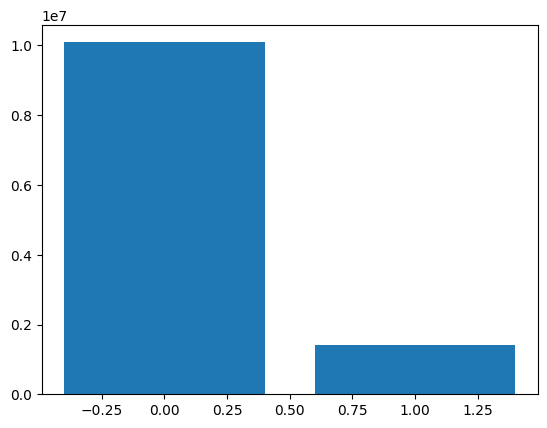

In [7]:
plt.bar([0, 1], train_df['Response'].value_counts())
train_df['Response'].value_counts()

### Load the test data

In [8]:
test_df = pd.read_csv(test_path)
print(test_df.shape)
test_df.head(5)

(7669866, 11)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [9]:
test_tmp = test_df.copy()
test_tmp['Gender'] = test_tmp['Gender'].replace(['Female', 'Male'], [0, 1])
test_tmp['Vehicle_Age'] = test_tmp['Vehicle_Age'].replace(['< 1 Year', '1-2 Year', '> 2 Years'], [0, 1, 2])
test_tmp['Vehicle_Damage'] = test_tmp['Vehicle_Damage'].replace(['No', 'Yes'], [0, 1])
test_tmp.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,0,20,1,47.0,0,0,0,2630.0,160.0,228
1,11504799,1,47,1,28.0,0,1,1,37483.0,124.0,123
2,11504800,1,47,1,43.0,0,1,1,2630.0,26.0,271
3,11504801,0,22,1,47.0,1,0,0,24502.0,152.0,115
4,11504802,1,51,1,19.0,0,1,0,34115.0,124.0,148


In [10]:
test_tmp[['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']] = test_tmp[['id', 'Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']].astype('uint8')
test_tmp[['Vintage', 'Annual_Premium']] = test_tmp[['Vintage', 'Annual_Premium']].astype('uint16')
test_tmp[test_tmp["Region_Code"]==39.2] = 39.0
test_tmp['Region_Code'] = test_tmp['Region_Code'] * 10
test_tmp['Region_Code'] = test_tmp['Region_Code'].astype('uint8')

# log
test_tmp['Annual_Premium'] = test_tmp['Annual_Premium']

test_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id                    uint8 
 1   Gender                uint8 
 2   Age                   uint8 
 3   Driving_License       uint8 
 4   Region_Code           uint8 
 5   Previously_Insured    uint8 
 6   Vehicle_Age           uint8 
 7   Vehicle_Damage        uint8 
 8   Annual_Premium        uint16
 9   Policy_Sales_Channel  uint8 
 10  Vintage               uint16
dtypes: uint16(2), uint8(9)
memory usage: 95.1 MB


In [11]:
train_tmp = train_tmp.drop('id', axis=1)

y = train_tmp['Response']
X = train_tmp.drop('Response', axis=1)

## Catboost Train

In [12]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

catboost_model = CatBoostClassifier(iterations=10,
                           depth=16,
                           learning_rate=0.01,
                           loss_function='Logloss',
                           verbose=True)

catboost_model.fit(X_train, y_train)
# Evaluate the model on the test data (optional)
accuracy = catboost_model.score(X_test, y_test)
print(f"Accuracy on test data: {accuracy}")

0:	learn: 0.6858626	total: 2.38s	remaining: 21.4s
1:	learn: 0.6799655	total: 4.3s	remaining: 17.2s
2:	learn: 0.6741631	total: 6.15s	remaining: 14.4s
3:	learn: 0.6686175	total: 6.91s	remaining: 10.4s


KeyboardInterrupt: 

## Xgboost Train

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the XGBoost classifier model
xgboost_model = xgb.XGBClassifier(
    n_estimators=10,       # Equivalent to 'iterations' in CatBoost
    max_depth=16,           # Equivalent to 'depth' in CatBoost
    learning_rate=0.01,     # Same as 'learning_rate' in CatBoost
    objective='binary:logistic',      # Equivalent to 'Logloss' in CatBoost
)

# Prepare the evaluation metric and monitoring set
eval_set = [(X_train, y_train), (X_test, y_test)]

# Fit the model with evaluation metrics
xgboost_model.fit(
    X_train, 
    y_train, 
    eval_set=eval_set,
    # eval_metric="logloss",  # Use a single string instead of a list
    verbose=True  # Prints evaluation results after every boosting round
)

# Evaluate the model on the test data (optional)
y_pred = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy}")

[0]	validation_0-logloss:0.38366	validation_1-logloss:0.38363
[1]	validation_0-logloss:0.38191	validation_1-logloss:0.38191
[2]	validation_0-logloss:0.38018	validation_1-logloss:0.38022
[3]	validation_0-logloss:0.37849	validation_1-logloss:0.37856
[4]	validation_0-logloss:0.37683	validation_1-logloss:0.37693
[5]	validation_0-logloss:0.37519	validation_1-logloss:0.37532
[6]	validation_0-logloss:0.37359	validation_1-logloss:0.37375
[7]	validation_0-logloss:0.37201	validation_1-logloss:0.37220
[8]	validation_0-logloss:0.37046	validation_1-logloss:0.37068
[9]	validation_0-logloss:0.36893	validation_1-logloss:0.36919
Accuracy on test data: 0.8770387142757805


In [13]:
from lightgbm import LGBMClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# LightGBM 모델 정의
lgbm_model = LGBMClassifier(n_estimators=10,
                            max_depth=16,
                            num_leaves=2**16-1,  # 너무 큰 값을 설정하지 않도록 주의
                            learning_rate=0.01,
                            objective='binary',
                            verbose=1,
                            force_col_wise=True)  # 메모리가 부족한 경우 사용

# 모델 학습
lgbm_model.fit(X_train, y_train)

y_pred = lgbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy}")

[LightGBM] [Info] Number of positive: 1132130, number of negative: 8071708
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 9203838, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.123006 -> initscore=-1.964264
[LightGBM] [Info] Start training from score -1.964264


## NN Train

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

# Standardizing the features
scaler = RobustScaler() # Premium, Age만 사용 나머지는 Standard Scaler 로 진행하기.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=3, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
nn_model.fit(X_train, y_train, epochs=1, batch_size=512, validation_data=(X_test, y_test))

# Evaluate the model on the test data
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")  # Converting probabilities to class labels

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy}")

2024-07-22 20:13:57.264856: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-22 20:13:58.009212: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-07-22 20:14:01.109807: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-22 20:14:01.202414: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the requir

71905/71905 [==============================] - 37s 510us/step
Accuracy on test data: 0.8772069049440233


In [ ]:
catboost_preds = catboost_model.predict_proba(X_test)[:, 1]
xgboost_preds = xgboost_model.predict_proba(X_test)[:, 1]
nn_preds = nn_model.predict(X_test).flatten()

71905/71905 [==============================] - 38s 523us/step


## Final Result

In [ ]:
combined_preds = (catboost_preds + xgboost_preds + nn_preds) / 3
y_pred = (combined_preds > 0.5).astype('int32')

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.8770387142757805


In [ ]:
# test_tmp = test_tmp.drop('id', axis=1)
catboost_preds = catboost_model.predict_proba(test_tmp)[:, 1]
xgboost_preds = xgboost_model.predict_proba(test_tmp)[:, 1]
nn_preds = nn_model.predict(test_tmp).flatten()
combined_preds = (catboost_preds + xgboost_preds + nn_preds) / 3

239684/239684 [==============================] - 128s 532us/step


In [ ]:
combined_preds

array([0.2065731 , 0.22629788, 0.22350691, ..., 0.20544422, 0.23669341,
       0.20540872])

In [ ]:
submission = pd.DataFrame({'id': test_df['id'], 'Response': combined_preds})

submission.to_csv('submission.csv', index=False)
print('Predictions saved to submission.csv')

Predictions saved to submission.csv
